In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Loading Dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
print(df_fake.shape,df_true.shape)

(23481, 4) (21417, 4)


In [ ]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


In [ ]:
df_fake["target"] = 0
df_true["target"] = 1

In [ ]:
df_true.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON () - The Whit...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla () - President Donald Tru...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON () - Alabama Secretary of State Joh...,politicsNews,"December 28, 2017",1


In [ ]:
df_fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)

merging fake and true dataframe

In [ ]:
df = pd.concat([df_fake,df_true],axis = 0)

In [ ]:
print(df.shape)

(44898, 2)


Checking null values in our dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   target  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
df.head(10)

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
df = df.sample(frac=1)
df.head(10)

,text,target
547,Donald Trump is a racist. We ve always known t...,0
8995,"GLASGOW, Scotland () - Most U.S. presidential ...",1
15806,"Meanwhile, families with two full time working...",0
19578,"It turns out the hypocrite, liberal, Golden S...",0
8085,WASHINGTON () - The U.S. Senate will vote on W...,1
15684,The Ferguson #BlackLivesMatter protesters are ...,0
21230,TOKYO () - Japan s defense ministry on Thursda...,1
6627,"You might remember a few months ago, the Berni...",0
14612,CARACAS () - Venezuela s sacked former chief p...,1
11710,DUBAI () - Saudi Arabia s King Salman received...,1


In [ ]:
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df.head(10)

,text,target
0,Donald Trump is a racist. We ve always known t...,0
1,"GLASGOW, Scotland () - Most U.S. presidential ...",1
2,"Meanwhile, families with two full time working...",0
3,"It turns out the hypocrite, liberal, Golden S...",0
4,WASHINGTON () - The U.S. Senate will vote on W...,1
5,The Ferguson #BlackLivesMatter protesters are ...,0
6,TOKYO () - Japan s defense ministry on Thursda...,1
7,"You might remember a few months ago, the Berni...",0
8,CARACAS () - Venezuela s sacked former chief p...,1
9,DUBAI () - Saudi Arabia s King Salman received...,1


Text(0, 0.5, 'Size of News Articles')

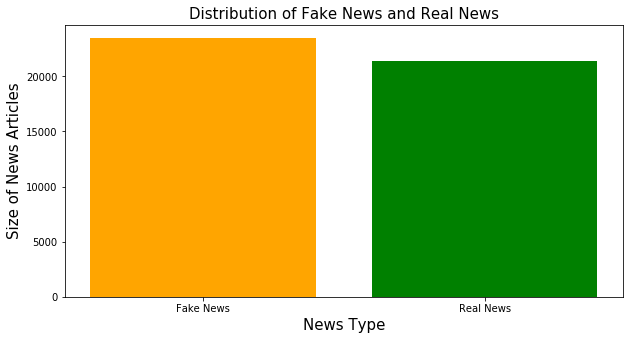

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df[df['target']==0]), color='orange')
plt.bar('Real News', len(df[df['target']==1]), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Size of News Articles', size=15)

# Removing Special Characters

In [ ]:
def wordopt(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove text within square brackets, often used for annotations or additional information
    text = re.sub('\[.*?\]', '', text)

    # Remove parentheses and content within them
    text = re.sub('[()]', '', text)

    # Replace non-word characters (symbols, punctuation) with a space
    text = re.sub('\\W', ' ', text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation using string.punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)
df.head(100)

,text,target
0,donald trump is a racist we ve always known t...,0
1,glasgow scotland most u s presidential ca...,1
2,meanwhile families with two full time working...,0
3,it turns out the hypocrite liberal golden s...,0
4,washington the u s senate will vote on wed...,1
...,...,...
95,budapest hungarian prime minister viktor or...,1
96,president trump just tweeted out a new policy ...,0
97,on thursday hillary clinton ripped donald tru...,0
98,moscow russian foreign minister sergei lavr...,1


# For Tokenization

In [ ]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/cds/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# For StopWords removal

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/cds/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cds/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
if "not" in stop_words:
    print("Not is present in stop_words")
else:
    print("Not is not present in stop_words")

Not is present in stop_words


In [ ]:
stop_words.remove('not')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

# For Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

# Applying tokenization,stopwords removal and lemmatization

In [ ]:
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''

    sentence = row['text']

    words = nltk.word_tokenize(sentence) #tokenization

    words = [w for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    df.loc[index,'text'] = filter_sentence

In [ ]:
print(df.head())

                                                text  target
0   donald trump racist always known repeatedly s...       0
1   glasgow scotland u presidential candidate go ...       1
2   meanwhile family two full time working parent...       0
3   turn hypocrite liberal golden state warrior c...       0
4   washington u senate vote wednesday measure bl...       1


In [ ]:
X = df["text"]
Y = df["target"]
X.shape

(44898,)

# Test-Train Split

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=5)
X_train.shape,Y_train.shape

((33673,), (33673,))

# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(X_train)
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
#print(analyze(X_train[0]))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)

(33673, 87489)
(11225, 87489)


In [ ]:
#Features of my Data
b=vectorization.get_feature_names()
b

['aa',
 'aaa',
 'aaaaaaaand',
 'aaaaapkfhk',
 'aaarf',
 'aab',
 'aaba',
 'aabo',
 'aaccording',
 'aachen',
 'aadhaar',
 'aadhar',
 'aadl',
 'aaf',
 'aahd',
 'aaja',
 'aal',
 'aalberg',
 'aalberts',
 'aaldef',
 'aaliyah',
 'aamer',
 'aamin',
 'aan',
 'aapi',
 'aapl',
 'aar',
 'aardal',
 'aardvark',
 'aarhus',
 'aaron',
 'aaronapollocamp',
 'aaroncovfefe',
 'aaroncynic',
 'aarondfordnv',
 'aaronson',
 'aarp',
 'aarti',
 'aarushi',
 'ab',
 'aba',
 'abaad',
 'abaaoud',
 'abaaouddinajpur',
 'ababa',
 'abacha',
 'aback',
 'abacus',
 'abad',
 'abadaly',
 'abadi',
 'abadie',
 'abady',
 'abair',
 'abandon',
 'abandoned',
 'abandonedhe',
 'abandoning',
 'abandonment',
 'abaonded',
 'abaribe',
 'abasaslani',
 'abate',
 'abated',
 'abatembo',
 'abating',
 'abaya',
 'abayomi',
 'abb',
 'abba',
 'abballakabul',
 'abbar',
 'abbas',
 'abbasi',
 'abbasid',
 'abbate',
 'abbaye',
 'abbe',
 'abbeville',
 'abbey',
 'abbie',
 'abbot',
 'abbotabad',
 'abbott',
 'abbottabad',
 'abbottnoteworthy',
 'abboud',
 

# Apply Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xv_train,Y_train)
y_pred=logreg.predict(xv_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy}')

Accuracy of Logistic Regression: 0.9800445434298442


0.9859828349122443
--------

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     17576
           1       0.98      0.99      0.99     16097

    accuracy                           0.99     33673
   macro avg       0.99      0.99      0.99     33673
weighted avg       0.99      0.99      0.99     33673

-------

Plotting Training Confusion Matrix


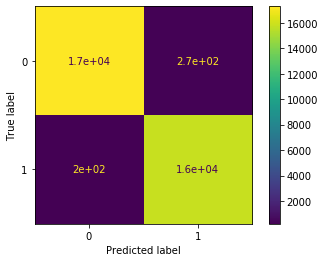

In [ ]:
from sklearn import metrics as m
y_pred_train= logreg.predict(xv_train)
print(m.accuracy_score(Y_train,y_pred_train))
print("--------\n")
print(m.classification_report(Y_train,y_pred_train))
print("-------\n")
print("Plotting Training Confusion Matrix")
p=m.ConfusionMatrixDisplay(m.confusion_matrix(Y_train,y_pred_train),display_labels=logreg.classes_)
p.plot()

[[5777  128]
 [  96 5224]]
Plotting Testing Confusion Matrix 


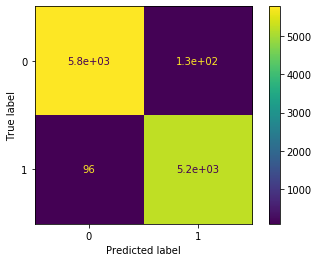

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
print("Plotting Testing Confusion Matrix ")
disp.plot()
plt.show()


In [ ]:
print("Printing testing Classification Report \n",classification_report(y_test,logreg.predict(xv_test)))

Printing testing Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5905
           1       0.98      0.98      0.98      5320

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



# BernoulliNaive Baiyes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()

The accuracy score  0.9425949573842545
The classification report 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     17576
           1       0.92      0.96      0.94     16097

    accuracy                           0.94     33673
   macro avg       0.94      0.94      0.94     33673
weighted avg       0.94      0.94      0.94     33673



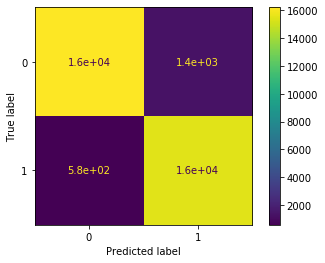

In [ ]:
nb.fit(xv_train,Y_train)
y_pred=nb.predict(xv_test)
y_pred_tr2=nb.predict(xv_train)
print("The accuracy score ",m.accuracy_score(Y_train,y_pred_tr2))
print("The classification report \n",m.classification_report(Y_train,y_pred_tr2))
p_nb=m.ConfusionMatrixDisplay(m.confusion_matrix(Y_train,y_pred_tr2),display_labels=nb.classes_)
p_nb.plot()

The accuracy score  0.9395100222717149
The classification report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      5905
           1       0.92      0.96      0.94      5320

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



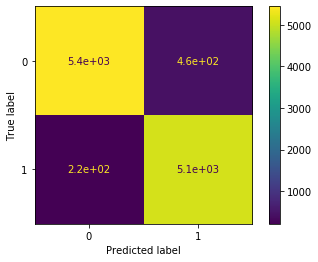

In [ ]:
print("The accuracy score ",m.accuracy_score(y_test,y_pred))
print("The classification report \n",m.classification_report(y_test,y_pred))
p_nb=m.ConfusionMatrixDisplay(m.confusion_matrix(y_test,y_pred),display_labels=nb.classes_)
p_nb.plot()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
ydtc_pred=dtc.predict(xv_test)

The Accuracy Score 0.9999703026163395
The Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17576
           1       1.00      1.00      1.00     16097

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673



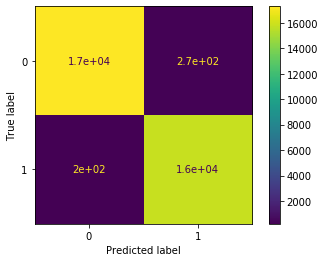

In [ ]:
y_pred_train2=dtc.predict(xv_train)
print("The Accuracy Score",m.accuracy_score(Y_train,y_pred_train2))
print("The Classification Report\n",m.classification_report(Y_train,y_pred_train2))
p=m.ConfusionMatrixDisplay(m.confusion_matrix(Y_train,y_pred_train),display_labels=dtc.classes_)
p.plot()

Accuracy of Decision Tree Classifier: 0.9497550111358575
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5905
           1       0.95      0.94      0.95      5320

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



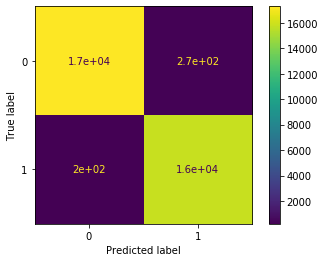

In [ ]:
accuracy_dtc = accuracy_score(y_test, ydtc_pred)
print(f'Accuracy of Decision Tree Classifier: {accuracy_dtc}')
print(classification_report(y_test,dtc.predict(xv_test)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
p.plot()

# Random- Forest -Classifier
Bagging Techniques

The Accuracy of the Random Forest Classifier Model in Test Data is 0.9813808463251671
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5905
           1       0.98      0.98      0.98      5320

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



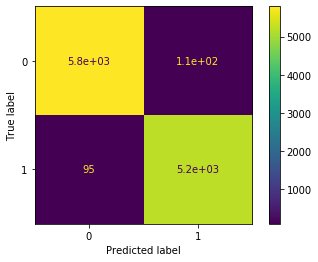

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model in Test Data is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))
p3=m.ConfusionMatrixDisplay(m.confusion_matrix(y_test,rclf.predict(xv_test)),display_labels=rclf.classes_)
p3.plot()

The accuracy  0.9999703026163395
The classifiction report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17576
           1       1.00      1.00      1.00     16097

    accuracy                           1.00     33673
   macro avg       1.00      1.00      1.00     33673
weighted avg       1.00      1.00      1.00     33673



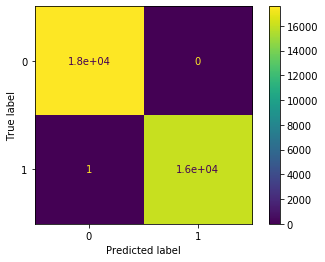

In [ ]:
y_pred_3=rclf.predict(xv_train)
print("The accuracy ",m.accuracy_score(Y_train,y_pred_3))
print("The classifiction report \n",m.classification_report(Y_train,y_pred_3))
p3=m.ConfusionMatrixDisplay(m.confusion_matrix(Y_train,y_pred_3),display_labels=rclf.classes_)
p3.plot()

# Pipelining

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = logreg.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_BNB = nb.predict(new_xv_test)
    pred_RFC = rclf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nBNB Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_BNB[0]),output_lable(pred_DT[0]),output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

BRUSSELS  - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against Taliban insurgents, saying: Our troops will fight to win . U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an extraordinary sacrifice of blood and treasure . We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will, Trump said

In [ ]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a

In [ ]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - A federal appeals court in Washington on Friday rejected a bid by President Donald Trump’s administration to prevent the U.S. military from accepting transgender recruits starting Jan. 1, the second court to issue such a ruling this week. Four federal judges around the country have issued injunctions blocking Trump’s ban on transgender people from the military, including one that was also handed down on Friday. The administration has appealed the previous three rulings. In a six-page order, the three-judge-panel of the U.S. Court of Appeals for the District of Columbia Circuit said the administration had “not shown a strong likelihood that they will succeed on the merits of their challenge” to a district court’s order blocking the ban. On Thursday the Richmond, Virginia-based 4th U.S. Circuit Court of Appeals said it was denying the administration’s request while the appeal proceeds. The two courts’ actions could prompt the administration to ask the conservative-

In [1]:
from tqdm.notebook import tqdm
import time

# Some iterable, e.g., range, list, etc.
iterable = range(10)

# Wrapping the iterable with tqdm
for item in tqdm(iterable, desc="Processing"):
    # Simulating some time-consuming task
    time.sleep(0.1)


Processing:   0%|          | 0/10 [00:00<?, ?it/s]